<a href="https://colab.research.google.com/github/villafue/Capstone_2_MovieLens/blob/main/MovieLens.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction

Hello! My name is Roland and this is my second Data Science Project, as well as second Capstone project with Springboard. My goal was recommendation system exploration.

I did my best to create a logical flow and organization to my notebook. Everything is categorized into sections and hyperlinked for easier navigation. As much as possible, I included markdowns inbetween the code to explain my thinking behind what I did. Please do not hesitate to contact me, and thank you for reading!

Last, I am thankful and grateful to Frank Kane and his Building Recommender Course on LinkedIn Learning. I adapted many of his codes and processes in my notebook. Him and others are referenced in section "6.3."


***

## Content

Note: The internal links work when the notebook is run via Google Colab.

1. **[Import Packages](#import_packages)**
2. **[Load Data](#load_data)**
3. **[Data Dreparation](#data_preparation)**
    - 3.1 - [Remove Outliers](#remove_outliers)
    - 3.2 - [Data Exploration](#data_exploration)   
    - 3.3 - [Treat Missing Values](#treat_missing_values)   
    - 3.4 - [Check Duplicates](#duplicates)
4. **[Exploratory Data Analysis](#exploratory_data_analysis)**
    - 4.1 - [Correlation Matrix](#correlation_matrix)
    - 4.2 - [Feature Engineering](#feature_engineering)
        - 4.2.1 - [Polynomials](#polynomials)
        - 4.2.2 - [Interior](#interior)
        - 4.2.3 - [Architectural & Structural](#architectural_&_structural)
        - 4.2.4 - [Exterior](#exterior)
        - 4.2.5 - [Location](#location)
        - 4.2.6 - [Land](#land)
        - 4.2.7 - [Access](#access)
        - 4.2.8 - [Utilities](#utilities)
        - 4.2.9 - [Miscellaneous](#miscellaneous)
    - 4.3 - [Target Variable](#target_variable)
    - 4.4 - [Treating Skewed Features](#treating_skewed_features)
5. **[Modeling](#modeling)**
    - 5.1 - [Model Exploration](#model_exploration)
        - 5.1.1 - [Baseline](#baseline)
        - 5.1.2 - [Simple Models](#simple_models)
        - 5.1.3 - [Advanced Linear Models](#advanced_linear_models)
        - 5.1.4 - [Ensemble Tree Models](#ensemble_tree_models)
    - 5.2 - [Training](#training)
        - 5.2.1 - [Feature Selection](#feature_selection)
        - 5.2.2 - [Reduction Comparison](#reduction_comparison)
    - 5.3 - [Optimization](#optimization)
        - 5.3.1 - [Linear Regression](#linear_regression)
        - 5.3.2 - [Ridge Regression](#ridge_regression)
        - 5.3.3 - [Lasso Regression](#lasso_regression)
        - 5.3.4 - [Elastic Net Regression](#elastic_net_regression)
        - 5.3.5 - [Random Forest Regressor](#random_forest_regressor)
        - 5.3.6 - [AdaBoost Regressor](#adaboost_regressor)
        - 5.3.7 - [GradientBoost Regressor](#gradientboost_regressor)
        - 5.3.8 - [XGBoost Regressor](#xgboost_regressor)
        - 5.3.8 - [Models Summary](#models_summary)
    - 5.4 - [Stacking](#stacking)
6. **[Conclusion](#conclusion)**
    - 6.1 - [Submission](#submission)
    - 6.2 - [Final Thoughts](#final_thoughts)
    - 6.3 - [References](#references)
    - 6.4 - [TPOT](#TPOT)

<a id='import_packages'></a>
# 1. 

---

<a name="import_packages"></a>
## Import Packages

In [56]:
# Import Pandas Profiling for quick insights
!{sys.executable} -m pip install -U pandas-profiling[notebook]
!jupyter nbextension enable --py widgetsnbextension

# This first set of packages include Pandas, for data manipulation,
# numpy for mathematical computation and matplotlib & seaborn, for visualisation.
import os
import pandas as pd
pd.set_option('display.notebook_repr_html', True)
pd.set_option('max_columns', 82)
pd.options.display.max_rows = 100
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from pandas_profiling import ProfileReport
print('\n', '=' * 136)
print('1: Quick Insights, Data Manipulation, Mathematical Computation and Visualisation packages imported!')

# Statistical packages used for transformations
from scipy import stats
from scipy.stats import skew, norm
from scipy.special import boxcox1p
from scipy.stats.stats import pearsonr
print('2: Statistical packages imported!')

# Metrics used for measuring the accuracy and performance of the models
from sklearn import metrics
from sklearn.metrics import mean_squared_error
print('3: Metrics packages imported!')

# Algorithms used for modeling
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
import xgboost as xgb
print('4: Algorithm packages imported!')

# Pipeline and scaling preprocessing will be used for models that are sensitive
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
print('5: Pipeline and preprocessing packages imported!')

# Model selection packages used for sampling dataset and optimising parameters
from sklearn import model_selection
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
print('6: Model selection packages imported!')

# Set visualisation colours
mycols = ["#66c2ff", "#5cd6d6", "#00cc99", "#85e085", "#ffd966", "#ffb366", "#ffb3b3", "#dab3ff", "#c2c2d6"]
print('7: My colours are ready! :)')

# To ignore annoying warning
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)
warnings.filterwarnings("ignore", category=DeprecationWarning)
print('8: Deprecation warning will be ignored!')

/bin/bash: {sys.executable}: command not found
Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK

1: Quick Insights, Data Manipulation, Mathematical Computation and Visualisation packages imported!
2: Statistical packages imported!
3: Metrics packages imported!
4: Algorithm packages imported!
5: Pipeline and preprocessing packages imported!
6: Model selection packages imported!
7: My colours are ready! :)
8: Deprecation warning will be ignored!


In [57]:
plt.rcParams.update(plt.rcParamsDefault)
%matplotlib inline
plt.style.use(['seaborn-whitegrid'])
sns.set_palette(palette = mycols, n_colors = 4)
sns.set(context='notebook', palette='deep')
print('9: My Axes are visible in "Dark Mode!"')

9: My Axes are visible in "Dark Mode!"


<a id='load_data'></a>
# 2. 


<a name="load_data"></a>
 ## Load data

First, I load the train and test datasets directly into Pandas dataframes. I load the data files directly from my Github as it allows me the flexibility to work from different computers.





I load the "links" csv into a pandas dataframe. 

In [58]:
url = 'https://raw.githubusercontent.com/villafue/Capstone_2_MovieLens/main/Data/links.csv'
links_df = pd.read_csv(url)
print(links_df.shape, '\n' * 2, 'The Movie Lens links csv has: ', links_df.shape[0], 'rows and ', links_df.shape[1], 'columns.')
# This makes a little barrier between printed outputs.
print('\n', '=' * 136, '\n' * 2, 'links_df Set:', '\n')
display(links_df.head())
print('\n', '=' * 136)

(9742, 3) 

 The Movie Lens links csv has:  9742 rows and  3 columns.


 links_df Set: 



,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


It has a little over 9,700 rows and three columns. The three columns correspond to Movie Lens identifier (MovieId), IMDb movie identifier (imdbId), and tmdbId (themoviedb.org). This could be used to link movies to their imdb database.  

In [59]:
links_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  9742 non-null   int64  
 1   imdbId   9742 non-null   int64  
 2   tmdbId   9734 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 228.5 KB


There is only 8 missing values for the tmdbId column and I'm not going to worry about it right now. 

***

I will load the movies csv. 

In [60]:
url = 'https://raw.githubusercontent.com/villafue/Capstone_2_MovieLens/main/Data/movies.csv'
movies_df = pd.read_csv(url)
print(movies_df.shape, '\n' * 2, 'The Movie Lens movies csv has: ', movies_df.shape[0], 'rows and ', movies_df.shape[1], 'columns.')
# This makes a little barrier between printed outputs.
print('\n', '=' * 136, '\n' * 2, 'movies_df Set:', '\n')
display(movies_df.head())
print('\n', '=' * 136)

(9742, 3) 

 The Movie Lens movies csv has:  9742 rows and  3 columns.


 movies_df Set: 



,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


It has a little over 9700 rows and three columns. It contains the MovieLens movie Id column, the name of the movie and year (title), and it's corresponding list of genres.

In [61]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


Thankfully, there are no missing values. 

***

I will upload the ratings csv into a dataframe. 

In [62]:
url = 'https://raw.githubusercontent.com/villafue/Capstone_2_MovieLens/main/Data/ratings.csv'
ratings_df = pd.read_csv(url)
print(ratings_df.shape, '\n' * 2, 'The Movie Lens ratings csv has: ', ratings_df.shape[0], 'rows and ', ratings_df.shape[1], 'columns.')
# This makes a little barrier between printed outputs.
print('\n', '=' * 136, '\n' * 2, 'ratings_df Set:', '\n')
display(ratings_df.head())
print('\n', '=' * 136)

(100836, 4) 

 The Movie Lens ratings csv has:  100836 rows and  4 columns.


 ratings_df Set: 



,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


***

This one has over 100,800 rows and 4 columns. The first one corresponds to each individual (userId) who rated a specific movie (movieId) and his/her rating via the rating column. It also has a timestamp column that needs to be converted to be understood. 

In [63]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


There are zero missing values.

In [64]:
ratings_df.userId.nunique()

610

Despite there being over 100k ratings, there are only 610 unique individuals. 

***

I will upload the tags csv into a pandas dataframe.

In [65]:
url = 'https://raw.githubusercontent.com/villafue/Capstone_2_MovieLens/main/Data/tags.csv'
tags_df = pd.read_csv(url)
print(tags_df.shape, '\n' * 2, 'The Movie Lens tags csv has: ', tags_df.shape[0], 'rows and ', tags_df.shape[1], 'columns.')
# This makes a little barrier between printed outputs.
print('\n', '=' * 136, '\n' * 2, 'tags_df Set:', '\n')
display(tags_df.head())
print('\n', '=' * 136)

(3683, 4) 

 The Movie Lens tags csv has:  3683 rows and  4 columns.


 tags_df Set: 



,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


This dataset has almost 3700 rows and 4 columns. It has a userId for each individual and a movieId for the "tags" each user gave. The "tag" column represents a word or short phrase given by each user. The timestamp column represents seconds since midnight Coordinated Universal Time (UTC) of January 1, 1970. 

In [66]:
tags_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   userId     3683 non-null   int64 
 1   movieId    3683 non-null   int64 
 2   tag        3683 non-null   object
 3   timestamp  3683 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 115.2+ KB


There are no missing values. 

In [67]:
tags_df.userId.nunique()

58

In [68]:
tags_df.movieId.nunique()

1572

There are only 58 individuals to gave tags to a total of 1572 movies.

***

Now, I am going to join ratings and the movies together into one dataframe. This would allow me to see which users rated what movies, as well as the title for each movieId.

In [94]:
us_mov_df_unsorted = pd.merge(ratings_df, movies_df)
print(us_mov_df_unsorted.shape)
us_mov_df_unsorted.head()

(100836, 6)


,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


I'm happy that it worked, but I need to sort it to make sense. I will sort first by the userId and then by the movieId

In [95]:
us_move_df = us_mov_df_unsorted.sort_values(by=['userId', 'movieId'], inplace=True)

Now, I'm going to export this dataframe so I can use excel to rapidly find a user who has movie tastes similar to my own. I will use this person to help qualitavely validate movies that are being recommended.

First, I'm going to specify what directory to download the file into. 

In [71]:
import os
# print(os.listdir())
# os.chdir('sample_data')
os.listdir()

<function posix.listdir>

Next, I'm going to [export](https://towardsdatascience.com/how-to-export-pandas-dataframe-to-csv-2038e43d9c03) the file and call it usmov.

In [72]:
# us_mov_df.to_csv('usmov')

It took me a few minutes but I found a suitable user who has similar tastes to my own. He/She is User 210.

Here is a handy guide to filter pandas dataframes with [multiple conditions](https://kanoki.org/2020/01/21/pandas-dataframe-filter-with-multiple-conditions/).

In [79]:
user_210_df = us_mov_df[(us_mov_df.userId == 210) & (us_mov_df.rating >= 4)].sort_values(by='rating', ascending=False)
user_210_df.head()

,userId,movieId,rating,timestamp,title,genres
1653,210,260,5.0,1473705468,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi
36486,210,5378,5.0,1473705524,Star Wars: Episode II - Attack of the Clones (...,Action|Adventure|Sci-Fi|IMAX
86989,210,177765,5.0,1537632257,Coco (2017),Adventure|Animation|Children
93505,210,146662,5.0,1513943333,Dragons: Gift of the Night Fury (2011),Adventure|Animation|Comedy
57274,210,122918,5.0,1513943744,Guardians of the Galaxy 2 (2017),Action|Adventure|Sci-Fi


***

Now I'm going to explore the data a little bit more. 

I'm going to see which users rated the most movies.

In [86]:
ratings_by_user = us_mov_df.drop('timestamp', axis=1)
ratings_by_user = ratings_by_user.groupby('userId').agg([np.size, np.mean])

movieId               rating          
          size          mean   size      mean
userId                                       
1          232   1854.603448  232.0  4.366379
2           29  70350.275862   29.0  3.948276
3           39   7058.384615   39.0  2.435897
4          216   1982.129630  216.0  3.555556
5           44    343.840909   44.0  3.636364
6          314    389.041401  314.0  3.493631
7          152  10908.256579  152.0  3.230263
8           47    297.978723   47.0  3.574468
9           46   3707.043478   46.0  3.260870
10         140  51465.307143  140.0  3.278571

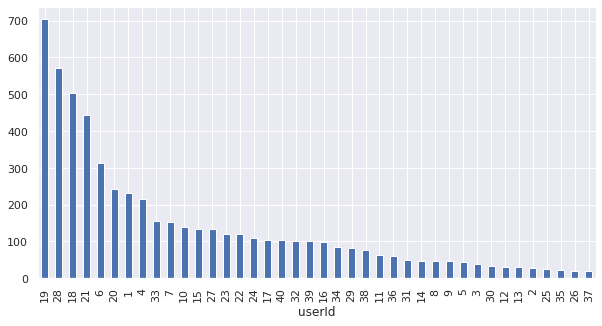

In [89]:
ratings_by_user.drop('movieId', axis=1)
ratings_by_user['rating']['size'].head(40).sort_values(ascending=False).plot(kind='bar', figsize=(10,5));

It looks like User 19 gave over 700 movie ratings, and the top 20 users had at least 100 ratings each. 

In [90]:
ratings_by_movies = us_mov_df.groupby('movieId').agg([np.mean, np.size])
print(ratings_by_movies.shape)

(9724, 6)


In [91]:
ratings_by_movies = ratings_by_movies.drop('userId', axis=1)

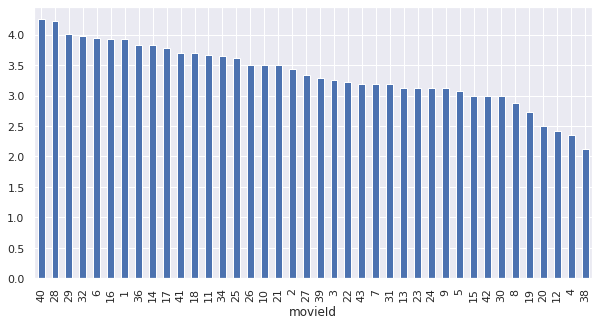

In [92]:
ratings_by_movies['rating']['mean'].head(40).sort_values(ascending=False).plot(kind='bar', figsize = (10,5));

These are the highest average movie ratings. I wonder which ones were the highest rated?

The "Test Set" has one less column than my train set. This is because the dependent variable "SalePrice," for the test set, is kept secret and is used as the final measure of the accuracy of my model.



Next, I want to see the column names.

In [ ]:
nf.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

Now, I will save the 'Id' columns, from both datasets, as it's necessary for preparing the final submission data. I'll drop them from my training and test datasets as they are redundant for modeling.

Here is a helpful link for ".format" and strings. [Python Format Function](https://www.geeksforgeeks.org/python-format-function/#:~:text=Diamond%20star%20pattern-,Python%20%7C%20format()%20function,a%20string%20through%20positional%20formatting.)

In [ ]:
train_ID = train['Id']
test_ID = test['Id']

train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)

print("The train data size after dropping Id feature is : {} ".format(train.shape)) 
print("The test data size after dropping Id feature is : {} ".format(test.shape))


The train data size after dropping Id feature is : (1460, 80) 
The test data size after dropping Id feature is : (1459, 79) 


***

I'll change my home directory because this is where I upload files, from my computer, into Colab.

In [ ]:
# os.chdir('sample_data')